In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import os
from PIL import Image

root_dir = "/kaggle/input/spectro/spectro"

corrupt = 0
for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".png"):
            path = os.path.join(subdir, file)
            try:
                img = Image.open(path)
                img.verify()  # Verifica que no esté corrupta
            except Exception as e:
                print(f"Corrupta: {path} -> {e}")
                corrupt += 1
                # Eliminarla si quieres
                # os.remove(path)

print(f"Total corruptas: {corrupt}")


2025-07-29 02:18:34.257894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753755514.282242     225 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753755514.289944     225 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Total corruptas: 0


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/kaggle/input/spectro-data/spectro"  # o la ruta donde tengas el dataset
img_size = (224, 224)
batch_size = 32

# Generador para entrenamiento con aumentos simples (opcional)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% para validación
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Indica que es para entrenamiento
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Indica que es para validación
    shuffle=False
)



Found 4916 images belonging to 5 classes.
Found 1227 images belonging to 5 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 clases
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1753755564.334315     291 service.cc:148] XLA service 0x7e0ad0005c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753755564.334351     291 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753755564.334356     291 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753755564.577639     291 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/154 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.2188 - loss: 2.6808 

I0000 00:00:1753755569.366497     291 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


154/154 ━━━━━━━━━━━━━━━━━━━━ 61s 350ms/step - accuracy: 0.5819 - loss: 1.5421 - val_accuracy: 0.6904 - val_loss: 0.8160
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 49s 317ms/step - accuracy: 0.7211 - loss: 0.7524 - val_accuracy: 0.6944 - val_loss: 0.8017
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 49s 319ms/step - accuracy: 0.7312 - loss: 0.7124 - val_accuracy: 0.7181 - val_loss: 0.7476
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 49s 319ms/step - accuracy: 0.7435 - loss: 0.6494 - val_accuracy: 0.7222 - val_loss: 0.7623
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 49s 319ms/step - accuracy: 0.7670 - loss: 0.5989 - val_accuracy: 0.7206 - val_loss: 0.7431
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 49s 317ms/step - accuracy: 0.7844 - loss: 0.5438 - val_accuracy: 0.7141 - val_loss: 0.8075
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 49s 318ms/step - accuracy: 0.7969 - loss: 0.5125 - val_accuracy: 0.7304 - val_loss: 0.7982
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 49s 317ms/step - accuracy: 0.8262 - loss: 0.4482 - val

In [8]:
model.save("/kaggle/working/seismic_model.h5")

In [12]:
loss, accuracy = model.evaluate(validation_generator)
print(f"✅ Validation Loss: {loss:.4f}")
print(f"✅ Validation Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.6193 - loss: 1.5530
✅ Validation Loss: 0.9880
✅ Validation Accuracy: 0.7294


39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step
📊 Classification Report:

              precision    recall  f1-score   support

          HY       0.33      0.17      0.22        42
          LP       0.61      0.80      0.69       115
          TC       0.76      0.62      0.68       439
          TR       0.38      0.23      0.29        94
          VT       0.79      0.93      0.85       537

    accuracy                           0.73      1227
   macro avg       0.57      0.55      0.55      1227
weighted avg       0.71      0.73      0.71      1227



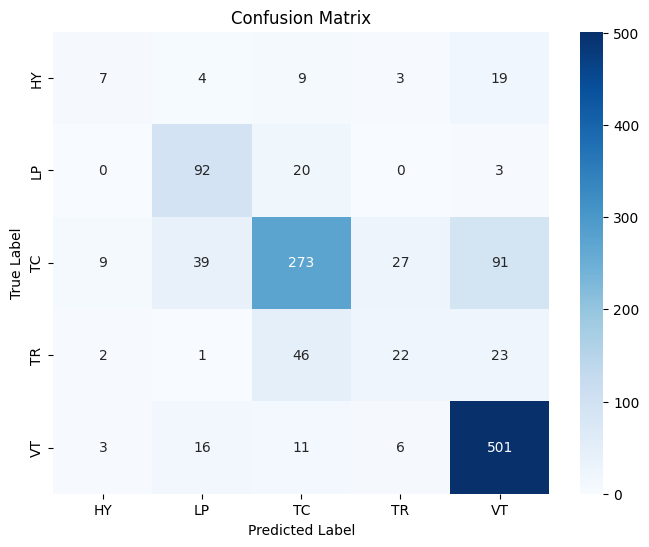

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener etiquetas verdaderas y predicciones
y_true = validation_generator.classes
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Reporte de clasificación
class_labels = list(validation_generator.class_indices.keys())
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


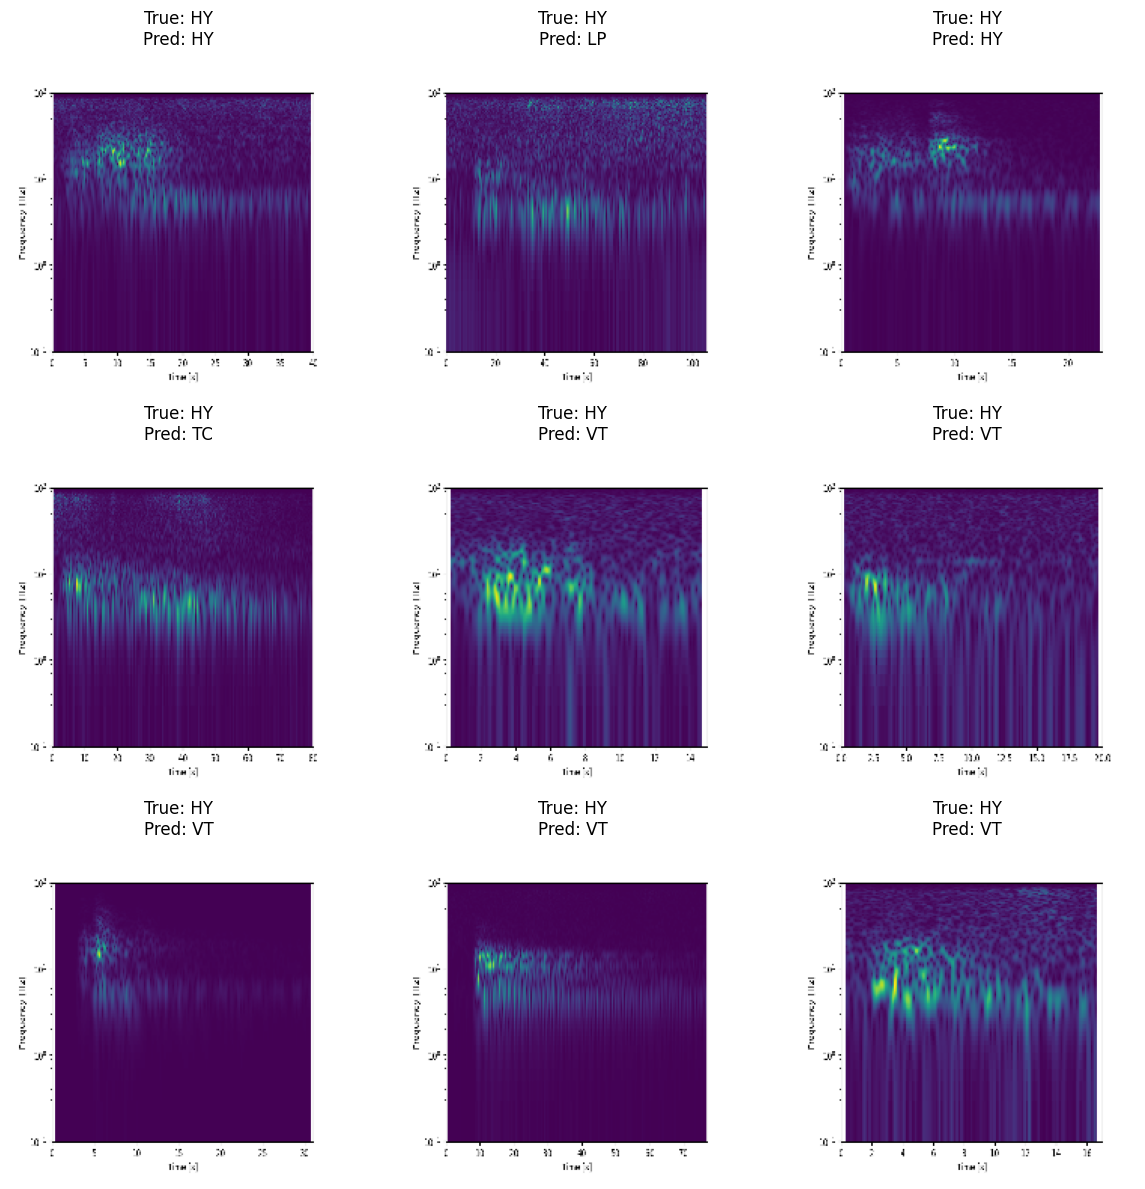

In [15]:
# Cargar una tanda de imágenes
x_val, y_val = next(validation_generator)
preds = model.predict(x_val)
predicted_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_val, axis=1)
class_labels = list(validation_generator.class_indices.keys())

# Mostrar algunas imágenes con predicciones
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


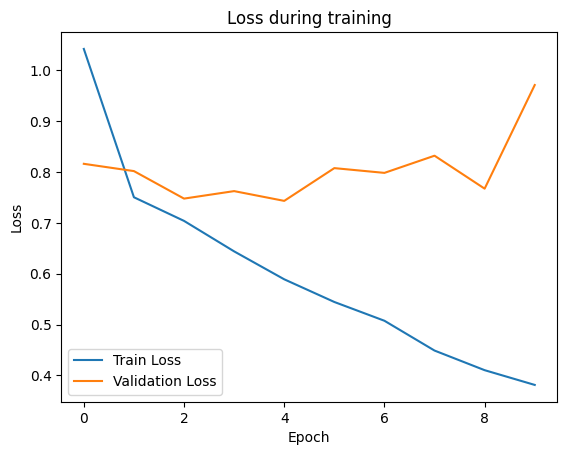

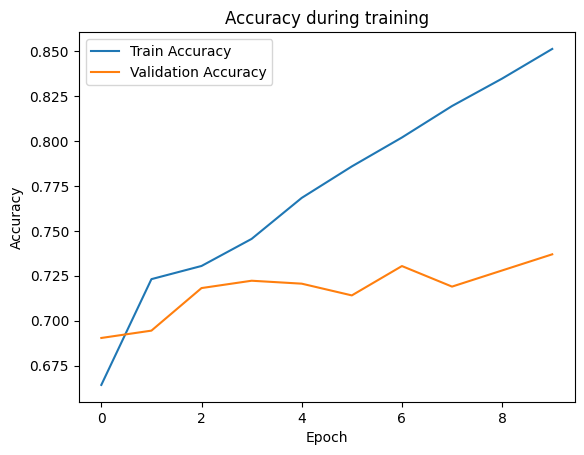

In [16]:
import matplotlib.pyplot as plt

# Pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
